#  World Happiness Data

## Imports

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator

## Explore Data

### Missing Values

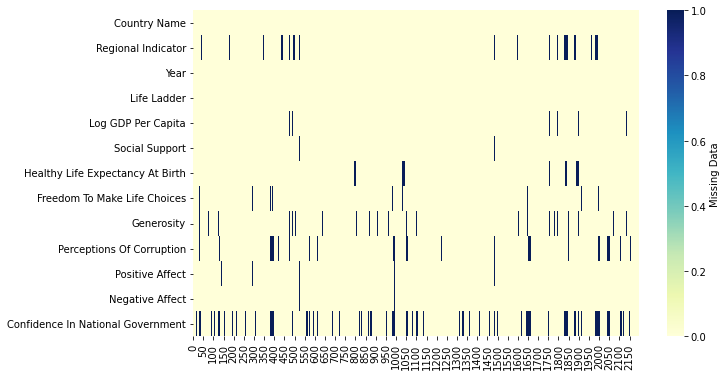

In [11]:
# Read in data
df = pd.read_csv("../backend/data/data.csv", encoding="utf-8")

# Display Missing values in heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

plt.show()


### Grouped by Country

#### Life Ladder

[]

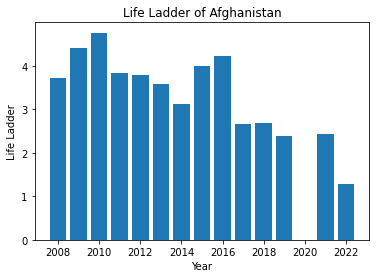

In [48]:
# Read in data
df = pd.read_csv("../backend/data/data.csv", encoding="utf-8")

df_grouped_by_country = df.groupby("Country Name")

plt.title('Life Ladder of Afghanistan')
plt.xlabel('Year')
plt.ylabel('Life Ladder')
df_afghanistan = df_grouped_by_country.get_group("Afghanistan")
bar_data = df_afghanistan[["Year", "Life Ladder"]]
bar_data.head()
plt.bar(x = bar_data["Year"], height = bar_data["Life Ladder"])
plt.plot()

#### Aggregated Values per Country

In [58]:
# Read in data
df = pd.read_csv("../backend/data/data.csv", encoding="utf-8")

df_grouped_by_country = df.groupby("Country Name")

# Select Country
df_afghanistan = df_grouped_by_country.get_group("Afghanistan")

# Pick relevant columns
df_afghanistan_reduced = df_afghanistan[["Life Ladder", "Log GDP Per Capita"]]

# Calculate mean values
mean_values = df_afghanistan_reduced.mean()
print("Mean Values for Afghanistan")
print(mean_values)

Mean Values for Afghanistan
Life Ladder           3.346632
Log GDP Per Capita    7.585588
dtype: float64


#### Filter by specific time range

In [74]:
# Read in data
df = pd.read_csv("../backend/data/data.csv", encoding="utf-8")

df_grouped_by_country = df.groupby("Country Name")

# Select Country
df_afghanistan = df_grouped_by_country.get_group("Afghanistan")

# Filter by specific time range
df_afghanistan = df_afghanistan[(df_afghanistan["Year"] > 2012) & (df_afghanistan["Year"] < 2015)]

df_afghanistan.head()


,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
5,Afghanistan,South Asia,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328,0.482847
6,Afghanistan,South Asia,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.105755,0.871242,0.491641,0.374861,0.409048


#### Scatter Plot

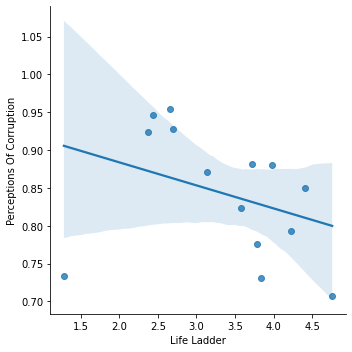

In [136]:
# Read in data
df = pd.read_csv("../backend/data/data.csv", encoding="utf-8")

df_grouped_by_country = df.groupby("Country Name")

# Select Country
df_afghanistan = df_grouped_by_country.get_group("Afghanistan")

# Filter by specific time range
df_afghanistan = df_afghanistan[(df_afghanistan["Year"] > 2006)]

# plt.title('Scatter Plot for Afghanistan')
# plt.xlabel('Life Ladder')
# plt.ylabel('Perceptions of Corruption')
# plt.xticks(ticks=df_afghanistan["Life Ladder"], labels=df_afghanistan["Year"])
# plt.scatter(x = df_afghanistan["Life Ladder"], y = df_afghanistan["Perceptions Of Corruption"])
# plt.plot()

sns.lmplot(x='Life Ladder',y='Perceptions Of Corruption',data=df_afghanistan,fit_reg=True) 

#### Correlation Heat Map

C:\Users\yhutter\AppData\Local\Temp\ipykernel_19764\3398574384.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_afghanistan_correlation.corr()


<AxesSubplot: >

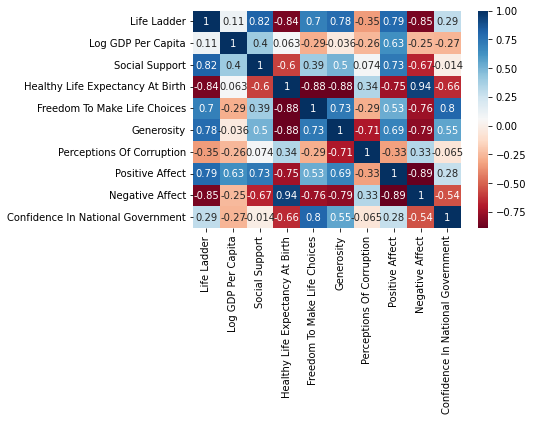

In [132]:
# Read in data
df = pd.read_csv("../backend/data/data.csv", encoding="utf-8")

df_grouped_by_country = df.groupby("Country Name")

# Select Country
df_afghanistan = df_grouped_by_country.get_group("Afghanistan")

# Filter by specific time range
df_afghanistan = df_afghanistan[(df_afghanistan["Year"] > 2006)]

# Remove year column for correlation matrix
df_afghanistan_correlation = df_afghanistan.drop("Year", axis=1)
correlation = df_afghanistan_correlation.corr()

sns.heatmap(correlation, cmap='RdBu', annot=True)

## Compare Country Ranks

In [161]:
# Read in data
df = pd.read_csv("../backend/data/data.csv", encoding="utf-8")


df_grouped_by_country = df.groupby("Country Name")

unique_countries = df["Country Name"].unique()
print(unique_countries)

# # Select Country
# df_afghanistan = df_grouped_by_country.get_group("Afghanistan")

# df_afghanistan.head()




['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Eswatini'
 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras'
 'Hong Kong S.A.R. of China' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos'
 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg'
 'Madagascar' 'Malawi' 'M

## Data Cleaning

In [10]:
# Read in data
df = pd.read_csv("../backend/data/data.csv", encoding="utf-8")

# Rename columns to more meaningful names
df.rename(columns={"Country Name": "country_name", "Regional Indicator": "regional_indicator", "Year": "year", "Life Ladder": "life_ladder", "Log GDP Per Capita": "log_gdp_per_capita", "Social Support": "social_support", "Healthy Life Expectancy At Birth": "healthy_life_expectancy_at_birth", "Freedom To Make Life Choices": "freedom_to_make_life_choices", "Generosity": "generosity", "Perceptions Of Corruption": "perceptions_of_corruption", "Positive Affect": "positive_affect", "Negative Affect": "negative_affect", "Confidence In National Government": "confidence_in_national_government"}, inplace=True)

df.head()

,country_name,regional_indicator,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,confidence_in_national_government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440
